**Universidad Internacional de La Rioja (UNIR) - Máster Universitario en Inteligencia Artificial - Procesamiento del Lenguaje Natural** 

***
Datos del alumno (Nombre y Apellidos): Denis Federico Zelaya Zelaya


Fecha:
***

<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Actividad 3: Desambiguación del sentido de las palabras</span>

**Objetivos** 

Con este laboratorio el alumno conseguirá aplicar diferentes algoritmos basados en aprendizaje automático supervisado para desambiguar el sentido de las palabras. Además, va a aprender a utilizar la herramienta de software abierto Natural Language Toolkit (NLTK) con la que implementar tareas de procesamiento del lenguaje natural en Python.

**Descripción**

En este laboratorio debes desarrollar e implementar diferentes algoritmos basados en aprendizaje automático supervisado para desambiguar el sentido de las palabras en Python y utilizando la herramienta de software abierto Natural Language Toolkit (NLTK).

Para preparar este laboratorio, simplemente descarga e instala **NLTK 3.3** en tu equipo.

***
Accede a NLTK 3.3 desde la siguiente dirección web:
https://www.nltk.org/install.html
***

NLTK requiere de Python versiones 2.7, 3.4, 3.5 o 3.6 para funcionar. Por lo que, si no tienes instalado Python, descárgalo e instálalo.

***
Accede a **Python**  desde la siguiente dirección web: https://www.python.org/downloads/
***

Asegúrate de que has instalado NLTK 3.3 adecuadamente antes de la sesión de laboratorio y de revisar el contenido teórico, Semántica léxica y temas anteriores, para tener frescos los diferentes conceptos sobre el procesamiento del lenguaje natural estudiados en esta asignatura.

Durante la sesión del laboratorio debes solucionar un problema sobre desambiguación del sentido de las palabras utilizando el corpus etiquetado en inglés llamado **Senseval 2** y que viene disponible en NLTK.

***
Accede a más información sobre **Senseval 2** desde la siguiente dirección web:
http://www.nltk.org/howto/corpus.html 
***

El primer paso es importar el corpus etiquetado utilizando los siguientes comandos:

In [1]:
import nltk
from nltk.corpus import senseval

In [3]:
# Descargar el corpus
nltk.download('senseval')

[nltk_data] Downloading package senseval to
[nltk_data]     C:\Users\Denis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\senseval.zip.


True

El corpus **Senseval 2** contiene datos etiquetados que sirven para entrenar un clasificador que permita desambiguar el sentido de las palabras. Cada elemento del corpus **Senseval 2** se corresponde a una palabra ambigua. Concretamente en este laboratorio se trabajará con las palabras en inglés *«hard»* y *«serve»*, aunque en el corpus hay información de otras dos.

Para poder extraer la información sobre las palabras es imprescindible la manera en la que se identifican en el corpus, es decir, sus identificadores. Con el siguiente comando, se extraen los identificadores de las palabras tratadas en el corpus. 

In [4]:
senseval.fileids()

['hard.pos', 'interest.pos', 'line.pos', 'serve.pos']

Para cada una de las palabras ambiguas, el corpus contiene una lista de instancias correspondientes a las ocurrencias de esa palabra. Para cada instancia se proporciona la palabra, una lista de sentidos que se aplican a la aparición de esa palabra y el contexto de la palabra. 

En la siguiente figura se observa el comando utilizado para visualizar la información que contiene cada instancia de la palabra ambigua *«hard»*.

In [5]:
senseval.instances('hard.pos')

[SensevalInstance(word='hard-a', position=20, context=[('``', '``'), ('he', 'PRP'), ('may', 'MD'), ('lose', 'VB'), ('all', 'DT'), ('popular', 'JJ'), ('support', 'NN'), (',', ','), ('but', 'CC'), ('someone', 'NN'), ('has', 'VBZ'), ('to', 'TO'), ('kill', 'VB'), ('him', 'PRP'), ('to', 'TO'), ('defeat', 'VB'), ('him', 'PRP'), ('and', 'CC'), ('that', 'DT'), ("'s", 'VBZ'), ('hard', 'JJ'), ('to', 'TO'), ('do', 'VB'), ('.', '.'), ("''", "''")], senses=('HARD1',)), SensevalInstance(word='hard-a', position=10, context=[('clever', 'NNP'), ('white', 'NNP'), ('house', 'NNP'), ('``', '``'), ('spin', 'VB'), ('doctors', 'NNS'), ("''", "''"), ('are', 'VBP'), ('having', 'VBG'), ('a', 'DT'), ('hard', 'JJ'), ('time', 'NN'), ('helping', 'VBG'), ('president', 'NNP'), ('bush', 'NNP'), ('explain', 'VB'), ('away', 'RB'), ('the', 'DT'), ('economic', 'JJ'), ('bashing', 'NN'), ('that', 'IN'), ('low-and', 'JJ'), ('middle-income', 'JJ'), ('workers', 'NNS'), ('are', 'VBP'), ('taking', 'VBG'), ('these', 'DT'), ('days

Por ejemplo, en la primera instancia (`SensevalInstance`) la palabra ambigua (`word`) es `‘hard-a’`, lo que indica que la palabra es `‘hard’` y en este caso la categoría gramatical es un adjetivo, identificado por el sufijo `‘-a’`.

El campo `position` indica la posición en la oración en la que se encuentra la palabra ambigua, en este caso la palabra `‘hard’` se encuentra en la posición 20.

El campo `context` representa el contexto, es decir, la oración en la que se encuentra la palabra ambigua, en este ejemplo *«"he may lose all popular support, but someone has to kill him to defeat him and that's hard to do."»*. El contexto viene representado por pares formados por una palabra y la correspondiente etiqueta gramatical. Por ejemplo, el par `(‘he’, ‘PRP’)` que aparece en el contexto indica que la categoría gramatical asociada a la palabra `‘he’` es un pronombre personal `‘PRP’`. 

Por último, el campo `senses` contiene los posibles sentidos de la palabra ambigua, en el ejemplo `‘HARD1’`. Los sentidos del corpus hacen referencia a los sentidos de la palabra recogidos en la base de datos de relaciones léxicas WordNet<sup>1</sup>.


<sup>1</sup> Puede que los sentidos que aparecen en Senseval 2 difieran de los que se encuentran actualmente en WordNet, debido a la constante actualización de este. En este laboratorio no será necesario trabajar con WordNet, se menciona como información adicional.

En este caso `‘HARD1’` hace referencia la primera definición de la palabra `‘hard’` que aparece en WordNet, a «difícil»,  *«difficult, hard (not easy; requiring great physical or mental effort to accomplish or comprehend or endure)»*. Esta información se puede obtener utilizando la interfaz de búsqueda web de WordNet cuyo resultado se muestra en la siguiente figura.

***
Accede al interfaz de búsqueda de WordNet desde la siguiente dirección web: http://wordnetweb.princeton.edu/perl/webwn

***



**Nota:** NLTK implementa también un lector para la información disponible en la base de datos de relaciones léxicas WordNet. Aunque no es necesario para realizar esta actividad de laboratorio, WordNet se puede importar utilizando el siguiente comando:

> *from nltk.corpus import wordnet*

En este laboratorio vas a trabajar con algoritmos basados en aprendizaje automático supervisado, por lo tanto, vas a tener que entrenar diferentes clasificadores que permitan desambiguar las palabras ambiguas en inglés «hard» y «serve», y vas a tener que evaluar el desempeño de los clasificadores creados.

Las diferentes partes que forman este laboratorio se indican a continuación.

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Parte 1: Análisis del corpus</span>

Analiza el corpus Senseval 2 que vas a utilizar para entrenar los clasificadores. Para realizar el análisis utiliza las funcionalidades que aporta NLTK. Desarrolla el código necesario y responde a las siguientes preguntas.

* ¿Cuántos posibles sentidos tienen las palabras ambiguas «hard» y «serve»? ¿Cuáles son esos sentidos? Para cada sentido indica la etiqueta que aparece en el corpus.

Método que a partir de la palabra ambigua, o mejor dicho del nombre del archivo del corpus `word` para la palabra ambigua, obtiene cuáles son los posibles **sentidos de la palabra ambigua**:

In [7]:
def senses(word):
    """
    This takes a target word from senseval-2 and it returns the list of possible senses for the word
    """
    return list(set(i.senses[0] for i in senseval.instances(word)))



Mostrar los sentidos de las palabras ambiguas:

In [8]:
senses('hard.pos')

['HARD3', 'HARD1', 'HARD2']

In [9]:
senses('serve.pos')

['SERVE10', 'SERVE2', 'SERVE12', 'SERVE6']

########## Aquí debes indicar tu respuesta ##########

* ¿Cuántas instancias hay en el corpus para cada uno de los sentidos de las palabras ambiguas «hard» y «serve»? Es decir, cuantas oraciones hay en el corpus etiquetadas con cada uno de los sentidos.

Método que obtiene todas las **instancias de un posible sentido de la palabra ambigua** a partir de la lista de instancias de una palabra `instances` y el nombre del sentido palabra ambigua `sense`:

In [10]:
def sense_instances(instances, sense):
    """
    This returns the list of instances in instances that have the sense sense
    """
    return [instance for instance in instances if instance.senses[0]==sense]

In [12]:
##################################################  
########## Aquí debes incluir tu código ##########  
##################################################
intance_founds = {}
for word in ['hard.pos','serve.pos']:
  sentidos = {}
  for sense in senses(word):
    count = len(sense_instances(senseval.instances(word),sense))
    sentidos[sense] = count
    print (f"Se encontraron {count} instancias para el sentido {sense} de la palabra {word}.")
  intance_founds[word] = sentidos

Se encontraron 376 instancias para el sentido HARD3 de la palabra hard.pos.
Se encontraron 3455 instancias para el sentido HARD1 de la palabra hard.pos.
Se encontraron 502 instancias para el sentido HARD2 de la palabra hard.pos.
Se encontraron 1814 instancias para el sentido SERVE10 de la palabra serve.pos.
Se encontraron 853 instancias para el sentido SERVE2 de la palabra serve.pos.
Se encontraron 1272 instancias para el sentido SERVE12 de la palabra serve.pos.
Se encontraron 439 instancias para el sentido SERVE6 de la palabra serve.pos.


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Distribución sentidos hard.pos')

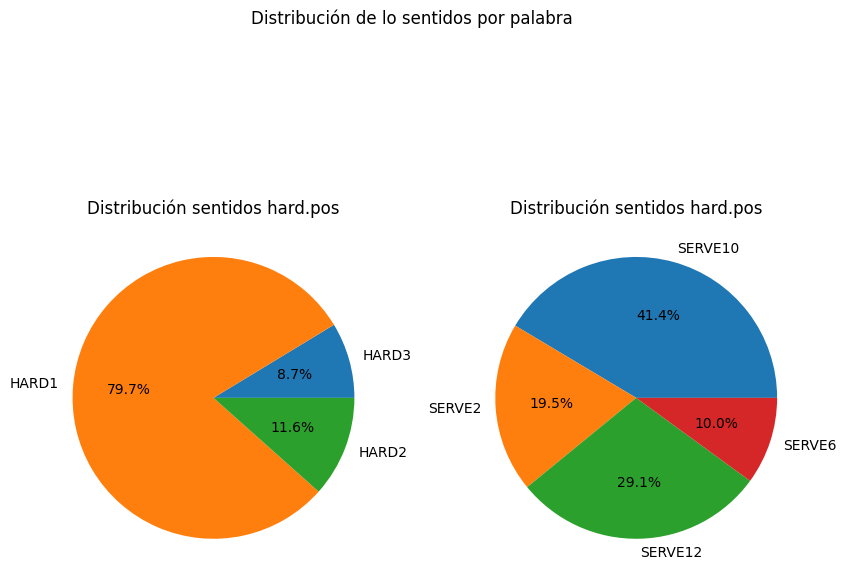

In [16]:
# PROPIO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle('Distribución de lo sentidos por palabra')

ax1.pie(list(intance_founds['hard.pos'].values()), labels=list(intance_founds['hard.pos'].keys()), autopct="%.1f%%")
ax1.set_title("Distribución sentidos hard.pos")

ax2.pie(intance_founds['serve.pos'].values(), labels=intance_founds['serve.pos'].keys(), autopct="%.1f%%")
ax2.set_title("Distribución sentidos hard.pos")

########## Aquí debes indicar tu respuesta ##########

* En el contexto, las palabras ambiguas pueden aparecer en diferentes formas gramaticales. Por ejemplo, en el caso de la palabra ambigua *«hard»*, esta aparece tanto la forma base, el adjetivo *«hard»* como en comparativo *«harder»* y como en superlativo *«hardest»*. ¿Qué formas gramaticales aparecen en el contexto para cada una de las palabas ambiguas *«hard»* y *«serve»*?

Método que muestra las diferentes **versiones de la palabra ambigua** a partir del nombre del archivo del corpus `word` para la palabra ambiguala palabra ambigua:

In [ ]:
def tokens(word):
    """
    This takes a target word from senseval-2 and it returns the list of possible tokens for the word
    """
    token = set()

    ##################################################  
    ########## Aquí debes incluir tu código ##########  
    ##################################################

    for inst in senseval.instances(word)[:]:
        token.update([w for (w,t) in inst.context[inst.position:inst.position+1]])
        
    return list(token)

Mostrar las diferentes versiones de la palabra ambigua

In [ ]:
tokens('hard.pos')

In [ ]:
tokens('serve.pos')

########## Aquí debes indicar tu respuesta ##########

* ¿Tienen todas las instancias que forman el corpus el formato que se ha descrito anteriormente? Si hay alguna instancia que no cumpla con ese formato, indica cuales serían las incongruencias que presenta y muestra algunos ejemplos.

In [ ]:
##################################################  
########## Aquí debes incluir tu código ##########  
##################################################

########## Aquí debes indicar tu respuesta ##########

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Parte 2: Extracción de características</span>

Para poder entrenar un clasificador es necesario extraer un conjunto de características lingüísticas a partir del corpus etiquetado. Por lo tanto, debes crear el código en Python que te permita extraer diferentes conjuntos de características a partir de Senseval 2. 

### Extracción de características basada en las palabras vecinas

Debes extraer un **conjunto de características basado en las palabras vecinas**. Para una instancia del corpus, debes desarrollar el código que sea capaz de extraer el vector de características que indican si las palabras de un vocabulario, que se debe construir previamente, aparecen o no en el contexto (la oración completa en que aparece la palabra ambigua).


Para una instancia de la palaba ambigua «hard» su contexto se muestra a continuación:

In [ ]:
instances_hard = senseval.instances('hard.pos')

In [ ]:
inst_hard_1 = instances_hard[1]

In [ ]:
inst_hard_1.context

Suponiendo que el vocabulario usado para crear extraer las características es el siguiente:

`['time', 'would', 'get', 'work', 'find', 'make']`

Entonces el vector de características extraídas para esa instancia sería:

`{'contains(time)': True, 
'contains(would)': False, 
'contains(get)': False, 
'contains(work)': False, 
'contains(find)': False, 
'contains(make)': False}`

Este vector de características indica que en el contexto de la palabra ambigua aparece la palabra *«time»* y no aparecen las palabras *«would»*, *«get»*, *«work»*, *«find»* y *«make»*.

Para extraer el vector de características basado en las palabras vecinas debes seguir los siguientes pasos:

#### 1. Construcción del vocabulario o bags of words. 

Como ya se ha indicado, para poder obtener el vector de características, se debe construir previamente un vocabulario. Para cada una de las palabras del vocabulario, se debe consultar si la palabra aparece en el contexto de la palabra ambigua. Si la palabra del vocabulario aparece en el contexto entonces en el vector de características aparecerá True para esa palabra y si no, False. 

Tomemos como ejemplo un vocabulario creado sobre el que se ha construido el vector de características. Este vocabulario es `['time', 'would', 'get', 'work', 'find', 'make']`. Este vocabulario se usará posteriormente para construir el vector de características del ejemplo que usamos para darte una orientación.

- **¿Cómo construyo mi vocabulario o bags of words?** Lo que debes hacer para tu entrega de este laboratorio es utilizar como vocabulario las m palabras más frecuentes que aparecen en las instancias que conforman el conjunto de datos, es decir en las oraciones que contienen las palabras ambiguas y que forman parte del corpus. Entonces, para crear la **bag of words** (bolsa de palabras) debes extraer el conjunto de las n palabras más frecuentes. Para ello te puedes ayudar de la función `nltk.FreqDist()` que proporciona información sobre la distribución de frecuencias de las palabras que aparecen en un texto. 

- Cuando obtengas las palabras más frecuentes, debes eliminar los signos que puntuación y las palabras vacías (aquellas sin significado como artículos, pronombres o preposiciones, las llamadas stop words en inglés). También debes eliminar las diferentes formas gramaticales de la palabra ambigua, por ejemplo, para desambiguar la palabra *«hard»* no tendría sentido utilizar la palabra *«harder»* ni la palabra *«hardest»*.

- Para la eliminación del conjunto de palabras no útiles del vocabulario se puede usar un código parecido al que se indica a continuación. Debes tener en cuenta que **en el código faltaría añadir las palabras que has identificado en la Parte 1** de este laboratorio como las diferentes formas gramaticales de las palabras ambiguas.

In [ ]:
from nltk.corpus import stopwords
import string
OTHER_WORDS = ["''", "'d", "'ll", "'m", "'re", "'s", "'t", "'ve", '--', '000', '1', '2', '3', '4', '5', '6', '8', '10', '15', '30', 'I', 'F', '``', 'also', "don'", 'n', 'one', 'said', 'say', 'says', 'u', 'us']
STOPWORDS_SET = set(stopwords.words('english')).union(set(string.punctuation), set(OTHER_WORDS))

- Ejemplo de vocabulario para un tamaño de 6. Por ejemplo, si se quiere entrenar un clasificador que permita identificar los diferentes sentidos de la palabra «hard» y se utilizan para entrenar y validar el modelo las instancias etiquetadas para esta palabra, la bolsa de palabras en el caso de considerar las seis palabras más frecuentes (m=6) sería la presentada anteriormente `['time', 'would', 'get', 'work', 'find', 'make']`.

Método que devuelve el **vocabulario** formado por las `m` palabras más frecuentes en el contexto de una palabra ambigua a partir de un conjunto de instancias `instances` y el conjunto de palabras no útiles `stopwords` (Nota: Recuerda que se deben eliminar las diferentes formas gramaticales de la palabra ambigua):

In [ ]:
def extract_vocab(instances, stopwords=STOPWORDS_SET, m=250):
    """
    Given a list of senseval instances, return a list of the m most frequent words that
    appears in its context (i.e., the sentence with the target word in), output is in order
    of frequency.
    """
    return [w for w,f in extract_vocab_frequency(instances,stopwords,m)]

In [ ]:
def extract_vocab_frequency(instances, stopwords=STOPWORDS_SET, m=250):
    """
    Given a list of senseval instances, return a list of the m most frequent words that
    appears in its context (i.e., the sentence with the target word in), output is in order
    of frequency and includes also the number of instances in which that key appears in the
    context of instances.
    """
    ##################################################  
    ########## Aquí debes incluir tu código ##########  
    ##################################################

Mostrar el vocabulario de tamaño de 6 para la palabra «hard», es decir el vocabulario creado usando las instancias de la a

In [ ]:
vocab_6 = extract_vocab(instances_hard, STOPWORDS_SET, m=6)

In [ ]:
vocab_6

#### 2. Construcción del conjunto de características basado en palabras vecinas. 

Utiliza un diccionario en Python para guardar el conjunto de características. La clave del diccionario serán las palabras del vocabulario y el valor debe ser un booleano para indicar la aparición o no de las palabras en el contexto. Por ejemplo, en el vector de características `{'contains(time)': True, 'contains(would)': False, 'contains(get)': False, 'contains(work)': False, 'contains(find)': False, 'contains(make)': False}` una de las claves del diccionario es `'contains(time)'` y su valor es `True`  lo que indica que en el contexto de la palabra ambigua aparece la palabra *«time»*.

- Debes mostrar el vector de características resultante para una de las instancias del corpus.

- **Importante:** En el cómputo del vector de características basado en las palabras vecinas debes utilizar como contexto la oración completa donde aparece la palabra ambigua. Es decir, todas las palabras que forman la oración guardada en el campo  `context` de la instancia.

Método que devuelve el conjunto de características basado en palabras vecinas para una instancia `instance` a partir de un vocabulario `vocab` (Nota: el parámetro `dist` no debes usarlo):

In [ ]:
def wsd_caracteristicas_palabras_vecinas(instance, vocab, dist=2):
    """
    Create a featureset where every key returns False unless it occurs in the
    instance's context
    """
    features = {}
    
    ##################################################  
    ########## Aquí debes incluir tu código ##########  
    ##################################################
                
    return features

Mostrar el vector de características basado en palabras vecinas para una de las instancias del corpus usando el vocabulario de seis palabras calculado previamente:

In [ ]:
wsd_caracteristicas_palabras_vecinas(inst_hard_1, vocab_6, 0)

### Extracción de características basada en características de colocación

Debes extraer también un **conjunto de características de colocación**. Para una instancia del corpus, debes desarrollar el código que sea capaz de extraer el vector de características formado por la secuencia de n palabras que ocurren antes de la palabra ambigua y la secuencia de n palabras que ocurren después de la palabra ambigua, los llamados n-gramas.

Para una instancia de la palaba ambigua «hard» su contexto se muestra a continuación:

In [ ]:
inst_hard_2737 = instances_hard[2737]

In [ ]:
inst_hard_2737.context

Entonces el vector de características de colocación para el bigrama anterior y posterior sería:

`{'previous(have a)': True, 'next(time imagining)': True}` 

Este vector de características indica que antes de la palabra ambigua se encuentran las palabras *«have a»* y después de la palabra ambigua las palabras *«time imagining»*. 

- **¿Cómo construyo mi conjunto y que n utilizo?** Utiliza un diccionario en Python para guardar el conjunto de características, la clave del diccionario debe indicar la secuencia de palabras de contexto y si aparecen antes o después de la palabra ambigua y el valor asociado a la clave debe ser un booleano verdadero. Usaremos **n=2**.

- Por ejemplo, en el vector de características `{'previous(have a)': True, 'next(time imagining)': True}` una de las claves del diccionario es `'previous(have a)'` y su valor es `True` lo que indica que antes de la palabra ambigua se encuentran las palabras *«have a»*. En este caso, al tener secuencias de dos palabras (*n=2*), se están considerando bigramas y la ventana tendría tamaño cinco (*2n+1*). Por lo tanto, si la palabra ambigua es *«hard» en el contexto guardado en el campo context de la instancia, aparece la siguiente parte de la frase «have a hard time imagining».

- Debes mostrar el vector de características resultante para una de las instancias del corpus.

- **Importante:** Debes tener en cuenta los posibles casos en los que la palabra ambigua aparezca al principio o final de la frase, ya que en esas instancias no vas a poder obtener una secuencia de palabras de longitud n. Por ejemplo, para la instancia cuyo contexto es: `[('some', 'DT'), ('hard', 'JJ'), ('choices', 'NNS'), ('had', 'VBD'), ('to', 'TO'), ('be', 'VB'), ('made', 'VBN'), …]` si n=2 deberías obtener el siguiente vector de características: `{'previous(some)': True, 'next(choices had)': True}`.

- **Nota:** aunque no es imprescindible para realizar esta actividad de laboratorio, puedes utilizar las funcionalidades para trabajar con n-gramas que ofrece NLTK. Estas se pueden importar utilizando el siguiente comando:

> *from nltk import ngrams*

Método que devuelve el conjunto de características de colocación para una instancia `instance` usando los n-gramas anterior y posterior donde la longitud de secuencia es de `dist` palabras (Nota: el parámetro `vocab` no debes usarlo):

In [ ]:
def wsd_caracteristicas_colocacion(instance, vocab, dist=2):
    features = {}
    
    ##################################################  
    ########## Aquí debes incluir tu código ##########  
    ##################################################
      
    return features

Mostrar el vector de características de colocación para una de las instancias del corpus usando n=2:

In [ ]:
wsd_caracteristicas_colocacion(inst_hard_2737, 0, 2)

<span style="font-size: 14pt; font-weight: bold; color: #0098cd;">Parte 3: Entrenamiento de clasificadores</span>

Debes entrenar diferentes clasificadores que permitan desambiguar las palabras ambiguas en inglés «hard» y «serve». Además, vas a tener que evaluar el desempeño de los clasificadores creados. Por lo tanto, debes crear el código en Python que te permita entrenar estos clasificadores y evaluarlos. 

El tipo de clasificador que vas a utilizar en este laboratorio es el Naive Bayes. Para importar el clasificador y el paquete que te permita evaluar su rendimiento debes utilizar el siguiente comando:

In [ ]:
from nltk.classify import accuracy, NaiveBayesClassifier
from nltk import ConfusionMatrix

Una vez hayas importado los paquetes anteriores, para entrenar un clasificador Naïve Bayes puedes usar el comando `NaiveBayesClassifier.train()` y para evaluarlo `accuracy()`. Además, puedes utilizar el clasificador entrenado para clasificar una instancia utilizando su método `classify()`. Por último, puedes obtener la matriz de confusión utilizando el comando `nltk.ConfusionMatrix()`.

Para realizar esta parte del laboratorio debes seguir los siguientes pasos:

### 1.	Entrenamiento de dos clasificadores para la palabra «hard». 

Debes entrenar dos clasificadores que permitan desambiguar la palabra «hard», es decir, que debes entrenar los clasificadores utilizando las instancias disponibles en el corpus Senseval 2 para esta palabra ambigua.

- **Conjuntos de entrenamiento y test.** Para entrenar y validar divide las instancias disponibles en una proporción del 80-20 % y recuerda que en el conjunto de datos de entrenamiento deben aparecer instancias de todas las clases. 

- **Clasificador basado en las palabras vecinas.** Con el conjunto de datos de entrenamiento, entrena un clasificador para «hard» que use como características el conjunto basado en las **palabras vecinas** cuyo código has implementado en la parte 2 de este laboratorio. Para definir el vocabulario utiliza las **250** palabras más frecuentes (**m=250**). 

- **Clasificador basado en características de colocación.** Con el conjunto de datos de entrenamiento, entrena un clasificador para «hard» que use como conjunto de características las de colocación cuyo código has implementado en la parte 2 de este laboratorio. Para definir la **ventana de contexto** utiliza la secuencia de dos palabras que ocurren antes de la palabra ambigua y la secuencia de dos palabras que ocurren después de esta **(n=2)**.

In [ ]:
def wsd_clasificador(word, features, stopwords_list = STOPWORDS_SET, number=250, distance=2, errors=False, confusion_matrix=False):
    """
    This function takes as arguments:
        a target word from senseval2;
        a feature set (this can be wsd_caracteristicas_palabras_vecinas or wsd_caracteristicas_colocacion);
        a list of stopwords 
        a number (defaults to 250), which determines for wsd_caracteristicas_palabras_vecinas the number of
            most frequent words within the context of a given sense that you use to classify examples;
        a distance (defaults to 2) which determines the size of the window for wsd_caracteristicas_colocacion;
        errors (defaults to false), which if set to True prints the errors;
        confusion_matrix (defaults to False), which if set to True prints a confusion matrix.

    Calling this function splits the senseval data for the word into a training set and a test set (the way it does
    this is the same for each call of this function, because the argument to random.seed is specified,
    but removing this argument would make the training and testing sets different each time you build a classifier).

    It then trains the trainer on the training set to create a classifier that performs WSD on the word,
    using features (with number or distance where relevant).

    It then tests the classifier on the test set, and prints its accuracy on that set.

    If error==True, then the errors of the classifier over the test set are printed out.
    For each error four things are recorded: (i) the example number within the test data (this is simply the index of the
    example within the list test_data); (ii) the sentence that the target word appeared in, (iii) the
    (incorrect) derived label, and (iv) the good label.

    If confusion_matrix==True, then calling this function prints out a confusion matrix, where each cell [i,j]
    indicates how often label j was predicted when the correct label was i (so the diagonal entries indicate labels
    that were correctly predicted).
    """

    
    # Split the instances into a training and test set

    ##################################################  
    ########## Aquí debes incluir tu código ##########  
    ##################################################

    
    # Train classifier
    
    classifier = 
    
        ##################################################  
        ########## Aquí debes incluir tu código ##########  
        ##################################################

    
    # Test classifier
    
    acc =  
    
        ##################################################  
        ########## Aquí debes incluir tu código ##########  
        ##################################################

        
    print('Accuracy: %6.4f' % acc)
    
    if errors==True:
        print('Errores: ')
        ##################################################  
        ########## Aquí debes incluir tu código ##########  
        ##################################################
        
        
    if confusion_matrix==True:
        print('Matriz de confusión: ')
        ##################################################  
        ########## Aquí debes incluir tu código ##########  
        ##################################################
        
    
    return classifier

### 2.	Validación de los clasificadores para la palabra «hard».  

Utilizando el conjunto de datos de test que has generado previamente, obtén la exactitud (accuracy) y la matriz de confusión para cada uno de los dos clasificadores que permiten desambiguar el sentido de la palabra «hard». 

- Debes mostrar la exactitud (accuracy) y la matriz de confusión resultantes de la validación de cada uno de los dos clasificadores.

In [ ]:
clasificador_hard_vecinas = wsd_clasificador('hard.pos', wsd_caracteristicas_palabras_vecinas, number=250, errors=False, confusion_matrix=True)

In [ ]:
clasificador_hard_colocacion = wsd_clasificador('hard.pos', wsd_caracteristicas_colocacion, distance=2, errors=False, confusion_matrix=True)

Debes comparar y analizar los resultados de rendimiento de los clasificadores. Para ello responde a las siguientes preguntas:

- ¿Cuál es el conjunto de características que aporta mejores resultados? ¿Por qué? 

########## Aquí debes indicar tu respuesta ##########

- ¿Cuál es el sentido más difícil de identificar? ¿Por qué?

########## Aquí debes indicar tu respuesta ##########

- ¿Qué posibles mejoras se podrían aplicar para mejorar el rendimiento de los clasificadores creados? No es necesario que las implementes, solo que las comentes.

########## Aquí debes indicar tu respuesta ##########

### 3.	Instancias clasificadas incorrectamente para «hard».   

Para el clasificador que permite desambiguar la palabra «hard» y que utiliza las características de colocación, obtén las instancias que pertenecen al sentido ‘HARD1’ y que se han clasificado incorrectamente. Presenta en el informe la oración en la que aparece la palabra ambigua (el contexto) para cada una de esas instancias y la etiqueta en la que han sido erróneamente clasificadas.

Para el clasificador que permite desambiguar la palabra «hard» y que utiliza las características de colocación, obtén las instancias que pertenecen al sentido ‘HARD1’ y que se han clasificado incorrectamente.

- Presenta la oración en la que aparece la palabra ambigua (el contexto) para cada una de esas instancias y la etiqueta en la que han sido erróneamente clasificadas.

In [ ]:
clasificador_hard_colocacion = wsd_clasificador('hard.pos', wsd_caracteristicas_colocacion, distance=2, errors=True, confusion_matrix=True)

########## Aquí debes indicar tu respuesta ##########

### 4.	Entrenamiento y validación de dos clasificadores para la palabra «serve».   

Repite el proceso anterior para entrenar y validar dos clasificadores que permitan desambiguar la palabra «serve». Puedes aprovechar el código que has generado anteriormente.

-	Crea los conjuntos de entrenamiento y test para las instancias donde la palabra ambigua es «serve». Mantén la proporción del 80-20 % para la creación de los conjuntos de entrenamiento y de test. 

-	Entrena un clasificador para «serve» que use como características el conjunto basado en las **palabras vecinas**. Para definir el vocabulario utiliza las **250** palabras más frecuentes (**m=250**).

-	Entrena un clasificador para «serve» que use como conjunto **de características las de colocación**. Para definir la **ventana de contexto** utiliza la secuencia de dos palabras que ocurren antes de la palabra ambigua y la secuencia de dos palabras que ocurren después de esta **(n=2)**. 

-	Obtén el valor la exactitud (accuracy) para cada uno de los dos clasificadores que permiten desambiguar el sentido de la palabra «sense». 

In [ ]:
clasificador_serve_vecinas = wsd_clasificador('serve.pos', wsd_caracteristicas_palabras_vecinas, number=250)

In [ ]:
clasificador_serve_colocacion = wsd_clasificador('serve.pos', wsd_caracteristicas_colocacion, distance=2, errors=False)

### 5.	Análisis de resultados del rendimiento de los clasificadores y conclusiones sobre el uso de aprendizaje automático supervisado para desambiguar el sentido de las palabras

Presenta una tabla resumen con los valores de exactitud para cada uno de los 4 clasificadores (dos para cada palabra ambigua) que has entrenado previamente y responde a las siguientes preguntas:

########## Aquí debes indicar tu respuesta ##########

* ¿Por qué no es justo comparar directamente la exactitud aportada por los clasificadores que han aprendido diferentes palabras ambiguas?

########## Aquí debes indicar tu respuesta ##########

* ¿Cómo podrías hacerlo para que la comparación entre clasificadores que desambiguan palabras diferentes tenga sentido?

########## Aquí debes indicar tu respuesta ##########

* Compara la exactitud de los clasificadores con la que proporcionaría un clasificador que asignara el sentido de forma aleatoria. ¿Cuál sería el mejor clasificador tomando como referencia (baseline), el clasificador aleatorio?

########## Aquí debes indicar tu respuesta ##########

Una vez hayas implementado diferentes clasificadores para desambiguar el sentido de diferentes palabras y analizado su desempeño, reflexiona sobre el uso de algoritmos basados en aprendizaje automático supervisado para resolver la tarea de desambiguación del sentido de las palabras. Para ello responde de forma razonada a las siguientes preguntas:

* ¿Cuáles son las limitaciones de los clasificadores que has creado para la desambiguación del sentido de las palabras?

########## Aquí debes indicar tu respuesta ##########

* ¿Qué alternativas propondrías para superar esas limitaciones y obtener algoritmo que resuelva mejor el problema de la desambiguación del sentido de las palabras?

########## Aquí debes indicar tu respuesta ##########